In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot, boxplot, heatmap
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE

In [57]:
!pip freeze > requirements.txt

In [13]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df['RiskLevel'].value_counts()
# data is imbalanced thus requires adjustments

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


From the above we can see that there is no missing or null values hence the data can be used for further analysis.

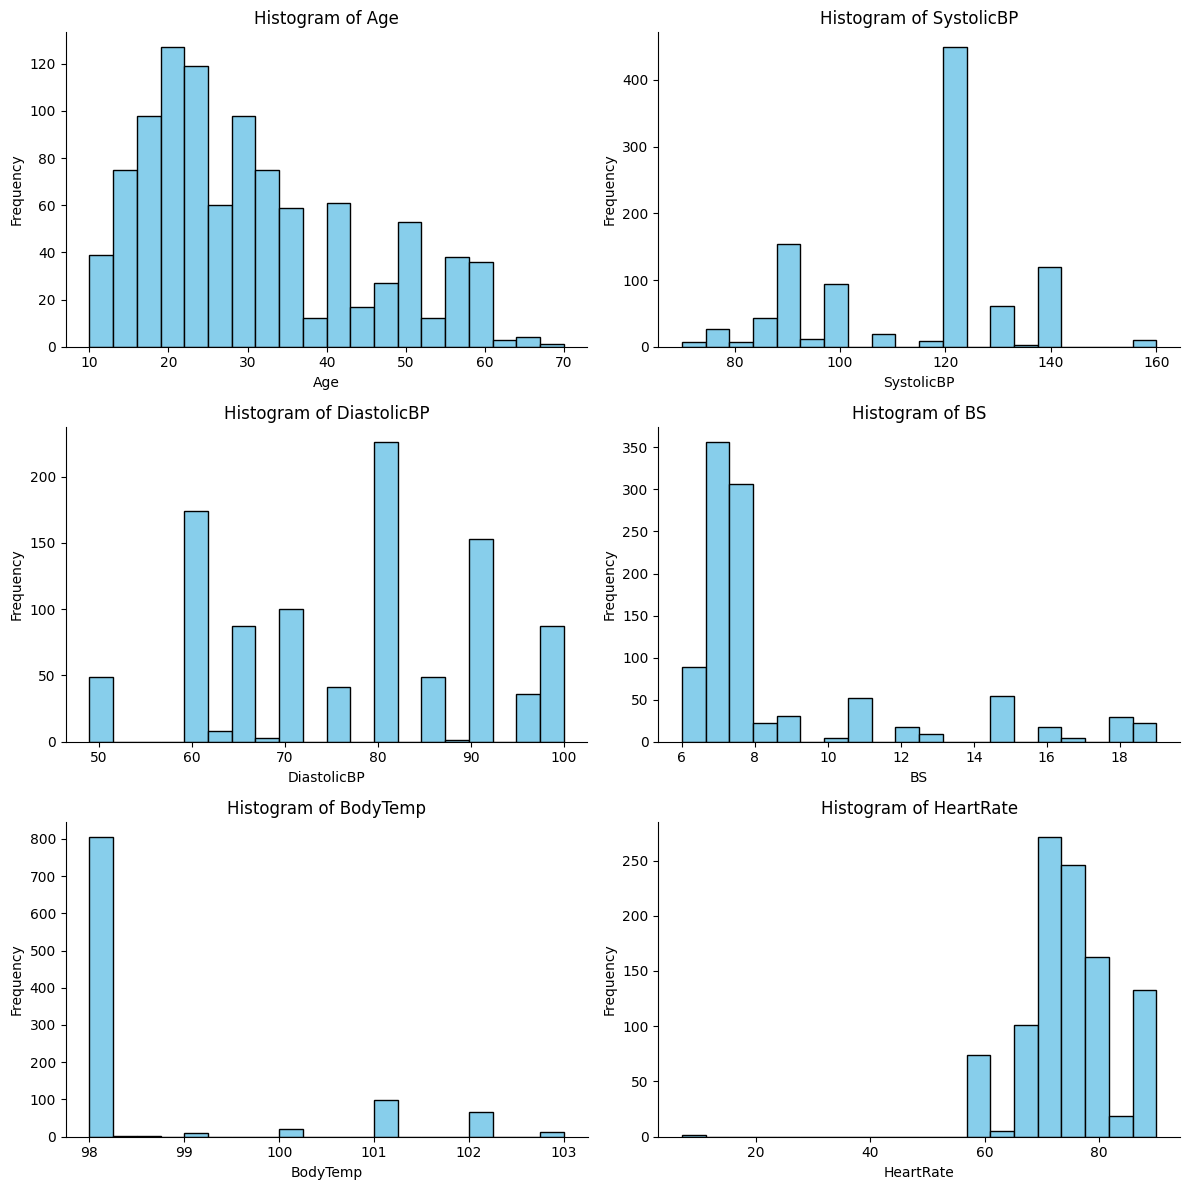

In [ ]:
#histogram plots for numerical data
columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
fig, axes = plt.subplots(len(columns) // 2 + len(columns) % 2, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, col in zip(axes, columns):
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.spines[['top', 'right']].set_visible(False)

#hide unused plots
for i in range(len(columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

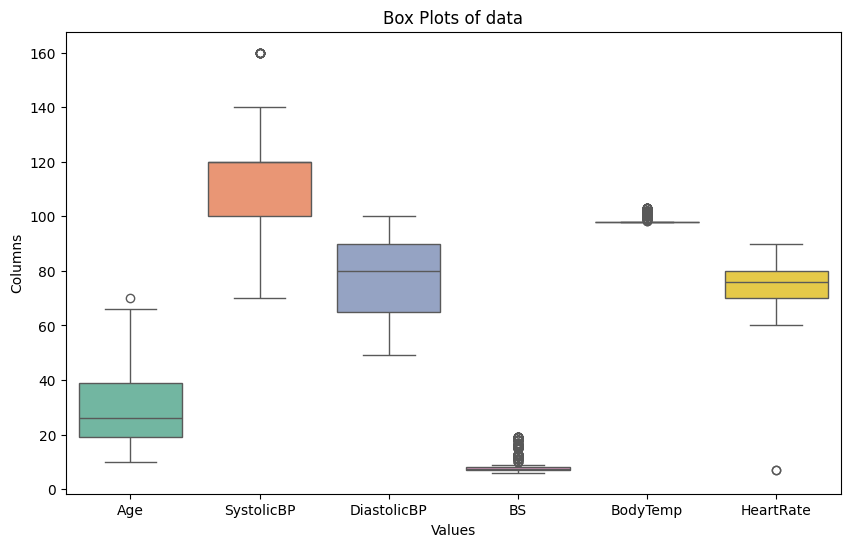

In [ ]:
#box plot of the data
plt.figure(figsize=(10, 6))
boxplot(data=df[columns], orient='v', palette='Set2')
plt.title('Box Plots of data')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

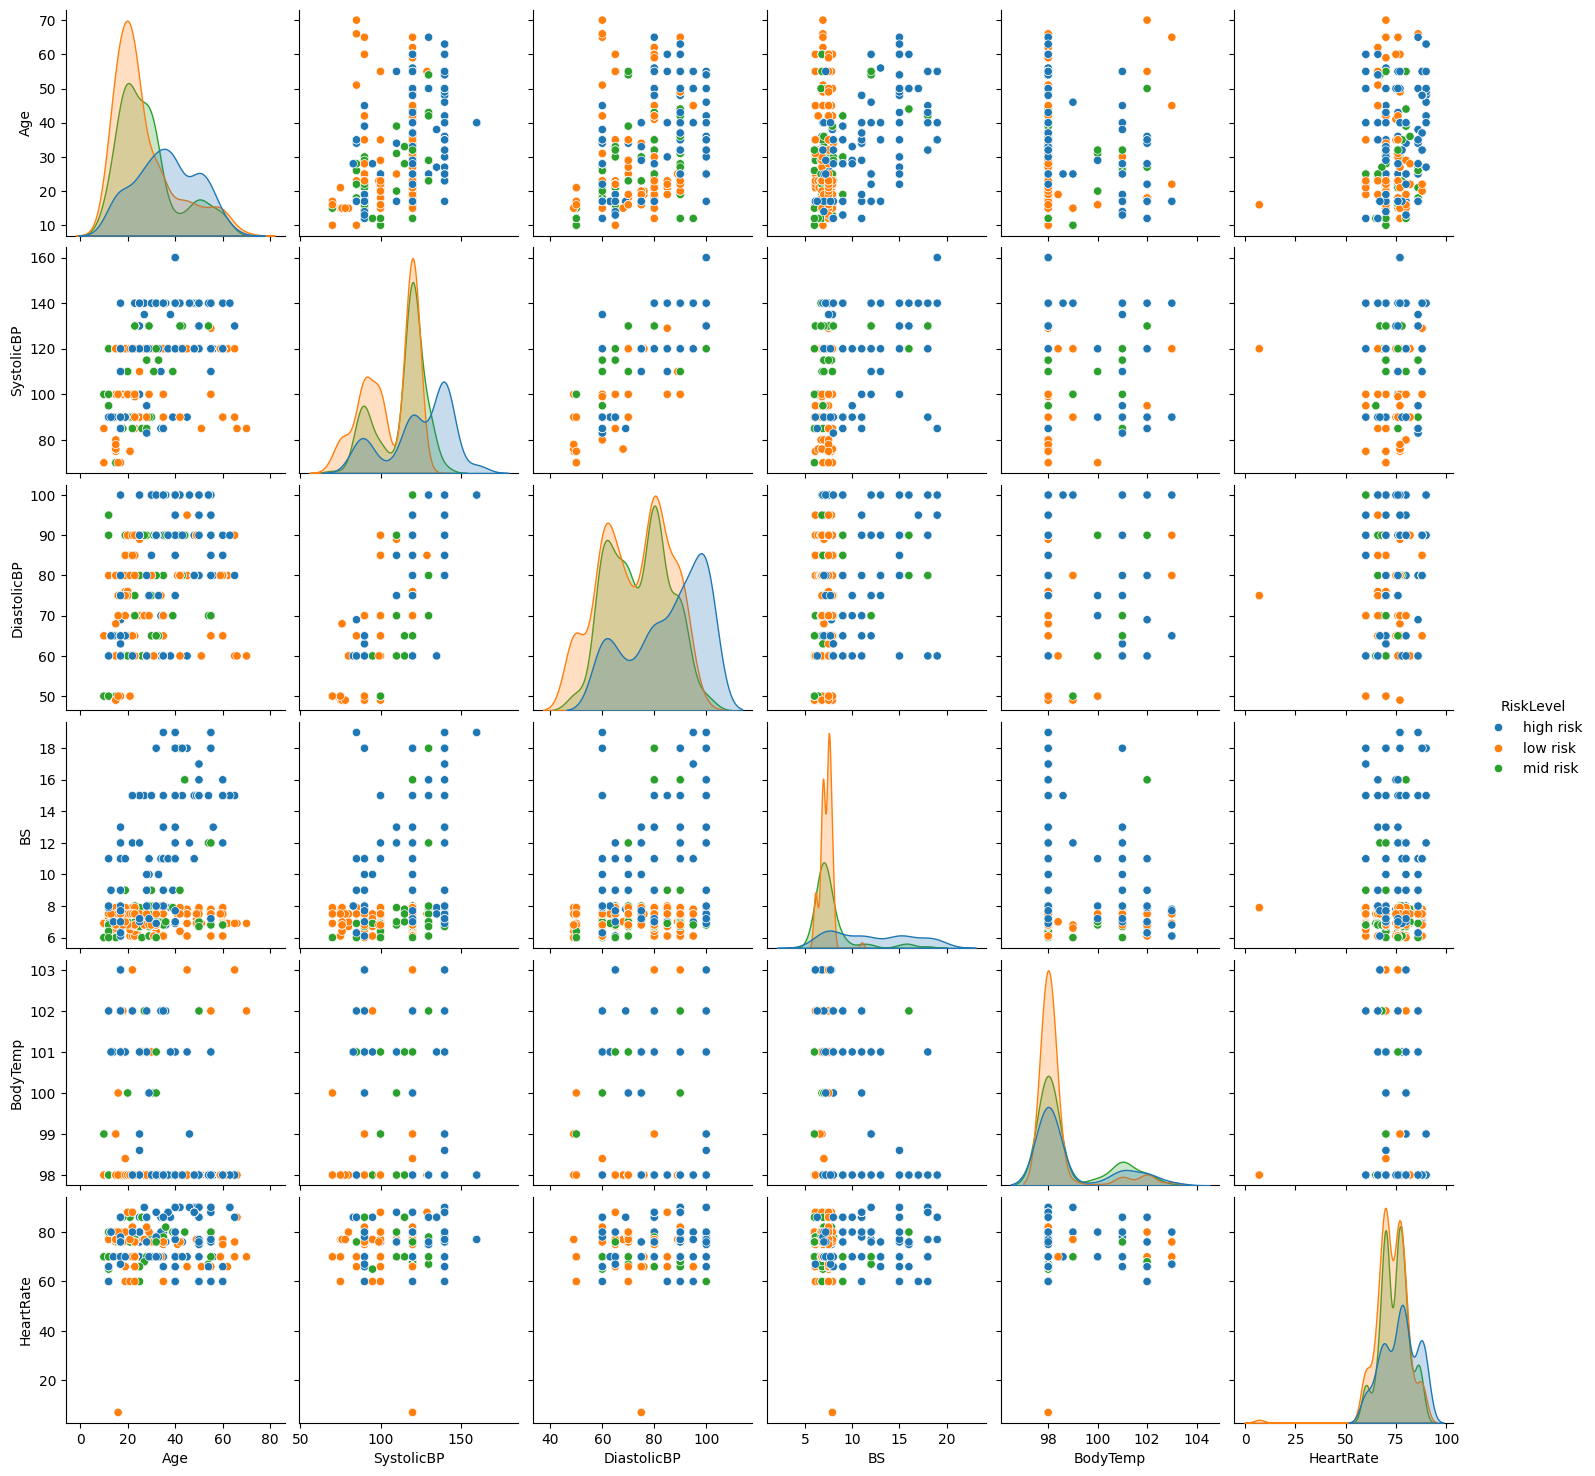

In [ ]:
# scatter pair plots with using RiskLevel as the hue. Uses pairplot from seaborn package
pairplot(df, hue="RiskLevel")
plt.show()

<ipython-input-55-7ad283f222d8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numberical_output = df.replace({'low risk': 0, 'mid risk': 1, 'high risk': 2})


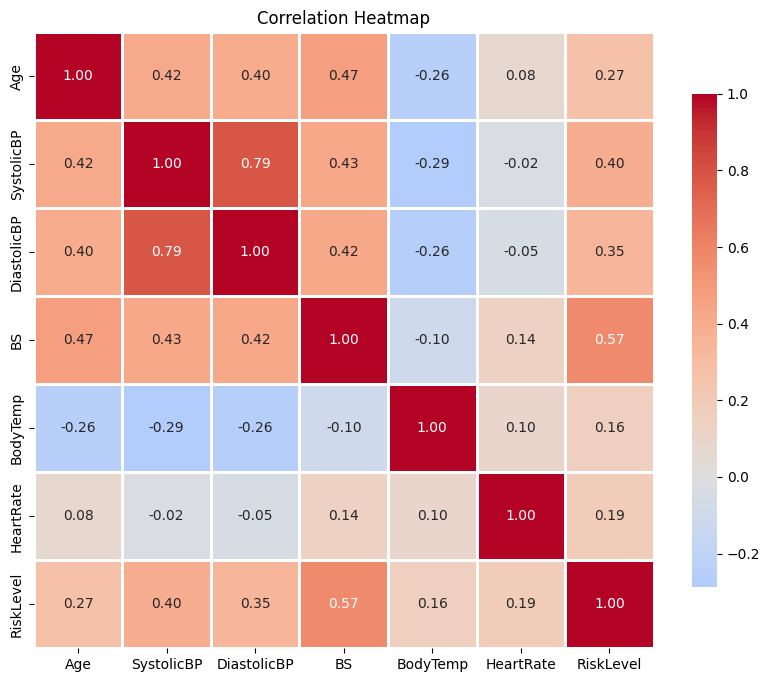

In [ ]:
df_numberical_output = df.replace({'low risk': 0, 'mid risk': 1, 'high risk': 2})
corr_matrix = df_numberical_output.corr()
plt.figure(figsize=(10, 8))
heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Data Pre processing

#create a new column Pulse Presure PP = SBP - DBP
df['PP'] = df['SystolicBP'] - df['DiastolicBP']

# split into target and data df's
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

#smote resamples the data to correct the imbalances in the data
sm = SMOTE()
X, y = sm.fit_resample(X, y)

#create train & split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data in columns for use Regression, SVM
stan_df =(X-X.mean())/X.std()
#create train & split sets with standardized data
X_train_stan, X_test_stan, y_train_stan, y_test_stan = train_test_split(stan_df, y, test_size=0.2, random_state=42)

# Normalize data in columns for use in KNN
norm_df=(X-X.min())/(X.max()-X.min())
# create train & test splits with normalized data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(norm_df, y, test_size=0.2, random_state=42)

Machine learning models

Linear regression cannot be used as the output is catagorical data.

1. Multinomial Logistic Regression
2. Decision trees
3. Random forest
4. SVM
5. Naive Bayes - Gaussian: as we have contineous features
6. K - NN (K nearrest neighbours)

In [15]:
# Logistic regression model

# hyper parameter optimization options
param_grid = [
  {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C' : np.logspace(-4, 4, 20), 'max_iter' : [100, 1000,2500, 5000]},
  {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'C' : np.logspace(-4, 4, 20), 'max_iter' : [100, 1000,2500, 5000]},
]


# multi_class='multinomial' is default
grid_search = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
grid_search.fit(X_train_stan, y_train_stan)
# get the best estimator
logistic_regression_model = grid_search.best_estimator_
# print the optimized params
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters: {'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [16]:
# Decision tree classifier model

# hyper parameter optimization options
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["gini", "entropy", "log_loss"],
    'ccp_alpha': [0.0, 0.01, 0.1],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')
grid_search.fit(X_train, y_train)
# get the best estimator
descition_tree_classifier = grid_search.best_estimator_
# print the optimized params
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
# Random forest classifier model

#hyper parameter omptimzation
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

#f1 socoring as the data is imbalanced
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=param_grid, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')
grid_search.fit(X_train, y_train)
# get the best estimator
random_forest_classifer = grid_search.best_estimator_
# print the optimized params
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [18]:
# support vector machine

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')
grid_search.fit(X_train_stan, y_train_stan)
# get the best estimator
svm = grid_search.best_estimator_
# print the optimized params
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'C': 100, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [19]:
# Gaussian Naive bayes classifeier
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')
grid_search.fit(X_train_stan, y_train_stan)
# get the best estimator
gaussian_naive_bayes = grid_search.best_estimator_
# print the optimized params
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'var_smoothing': 1e-09}


In [20]:
# K Nearest neighbours
param_grid = {
    'n_neighbors': [7, 9, 11, 15, 17, 19],
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['minkowski',],  # Distance metric
    'p': [1, 2, 3 , 4],  # Power parameter for Minkowski metric 1 corresponds to manhatton distance, 2 corresponds to educlidian
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Search algorithm
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')
grid_search.fit(X_train_norm, y_train_norm)
# get the best estimator
knn = grid_search.best_estimator_
# print the optimized params
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


Model Evaluation
1. Accuracy
2. The F1 score: Combines perscision & recall

In [21]:
y_pred_logistic_regression = logistic_regression_model.predict(X_test_stan)
y_pred_descition_tree_classifier = descition_tree_classifier.predict(X_test)
y_pred_random_forest_classifer = random_forest_classifer.predict(X_test)
y_pred_svm = svm.predict(X_test_stan)
y_pred_gaussian_naive_bayes = gaussian_naive_bayes.predict(X_test_stan)
y_pred_knn = knn.predict(X_test_norm)

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gaussian Naive Bayes', 'KNN']
accuracies = []
f1_scores = []
precision_scores = []
recall_scores = []

accuracies.append(accuracy_score(y_test_stan, y_pred_logistic_regression))
accuracies.append(accuracy_score(y_test, y_pred_descition_tree_classifier))
accuracies.append(accuracy_score(y_test, y_pred_random_forest_classifer))
accuracies.append(accuracy_score(y_test_stan, y_pred_svm))
accuracies.append(accuracy_score(y_test_stan, y_pred_gaussian_naive_bayes))
accuracies.append(accuracy_score(y_test_stan, y_pred_knn))


f1_scores.append(f1_score(y_test_stan, y_pred_logistic_regression, average='macro'))
f1_scores.append(f1_score(y_test, y_pred_descition_tree_classifier, average='macro'))
f1_scores.append(f1_score(y_test, y_pred_random_forest_classifer, average='macro'))
f1_scores.append(f1_score(y_test_stan, y_pred_svm, average='macro'))
f1_scores.append(f1_score(y_test_stan, y_pred_gaussian_naive_bayes, average='macro'))
f1_scores.append(f1_score(y_test_stan, y_pred_knn, average='macro'))


precision_scores.append(precision_score(y_test_stan, y_pred_logistic_regression, average='macro'))
precision_scores.append(precision_score(y_test, y_pred_descition_tree_classifier, average='macro'))
precision_scores.append(precision_score(y_test, y_pred_random_forest_classifer, average='macro'))
precision_scores.append(precision_score(y_test_stan, y_pred_svm, average='macro'))
precision_scores.append(precision_score(y_test_stan, y_pred_gaussian_naive_bayes, average='macro'))
precision_scores.append(precision_score(y_test_stan, y_pred_knn, average='macro'))

recall_scores.append(recall_score(y_test_stan, y_pred_logistic_regression, average='macro'))
recall_scores.append(recall_score(y_test, y_pred_descition_tree_classifier, average='macro'))
recall_scores.append(recall_score(y_test, y_pred_random_forest_classifer, average='macro'))
recall_scores.append(recall_score(y_test_stan, y_pred_svm, average='macro'))
recall_scores.append(recall_score(y_test_stan, y_pred_gaussian_naive_bayes, average='macro'))
recall_scores.append(recall_score(y_test_stan, y_pred_knn, average='macro'))


table_data = [
    ['Model', 'Accuracy', 'Prescision', 'Recall', 'F1 Score']
]

for i in range(len(model_names)):
    table_data.append([
        model_names[i],
        accuracies[i],
        precision_scores[i],
        recall_scores[i],
        f1_scores[i]
    ])

table = tabulate(table_data, headers='firstrow', tablefmt='fancy_grid')
print(table)


╒══════════════════════╤════════════╤══════════════╤══════════╤════════════╕
│ Model                │   Accuracy │   Prescision │   Recall │   F1 Score │
╞══════════════════════╪════════════╪══════════════╪══════════╪════════════╡
│ Logistic Regression  │   0.639344 │     0.645214 │ 0.64446  │   0.644444 │
├──────────────────────┼────────────┼──────────────┼──────────┼────────────┤
│ Decision Tree        │   0.840164 │     0.854653 │ 0.84425  │   0.847887 │
├──────────────────────┼────────────┼──────────────┼──────────┼────────────┤
│ Random Forest        │   0.868852 │     0.878816 │ 0.872813 │   0.875032 │
├──────────────────────┼────────────┼──────────────┼──────────┼────────────┤
│ SVM                  │   0.762295 │     0.773694 │ 0.769538 │   0.771161 │
├──────────────────────┼────────────┼──────────────┼──────────┼────────────┤
│ Gaussian Naive Bayes │   0.684426 │     0.730987 │ 0.683717 │   0.683834 │
├──────────────────────┼────────────┼──────────────┼──────────┼────────────┤